In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Default_Fin.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [4]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
df.drop('Index', axis= 1, inplace=True)
df = df.rename(columns={'Defaulted?': 'Default'})

In [6]:
df.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Default          0
dtype: int64

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
Default,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


In [8]:
df['Default'].value_counts()

0    9667
1     333
Name: Default, dtype: int64

<Axes: ylabel='Default'>

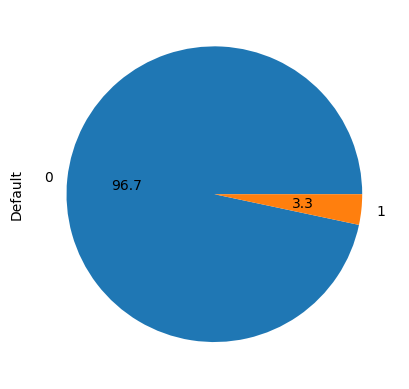

In [9]:
df['Default'].value_counts().plot.pie(autopct= '%.1f')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Default'], axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier())
]

def evaluate_classifier(clf, X_test_scaled, y_test):
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]

    report = classification_report(y_test, y_pred)
    print(report)

    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {roc_auc:.4f}\n")

for clf_name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    print(f"Classifier: {clf_name}\n")
    evaluate_classifier(clf, X_test_scaled, y_test)



Classifier: Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.66      0.28      0.39        69

    accuracy                           0.97      2000
   macro avg       0.81      0.64      0.69      2000
weighted avg       0.96      0.97      0.96      2000

ROC AUC Score: 0.9435

Classifier: Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.34      0.32      0.33        69

    accuracy                           0.95      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.95      0.95      0.95      2000

ROC AUC Score: 0.6483

Classifier: Random Forest

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.47      0.28      0.35        69

    accuracy                           0.96      

In [22]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train_scaled, y_train)

for clf_name, clf in classifiers:
    clf.fit(X_train_under, y_train_under)
    print(f"Classifier (Under-sampled): {clf_name}\n")
    evaluate_classifier(clf, X_test_scaled, y_test)



Classifier (Under-sampled): Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1931
           1       0.19      0.87      0.31        69

    accuracy                           0.86      2000
   macro avg       0.59      0.87      0.61      2000
weighted avg       0.97      0.86      0.90      2000

ROC AUC Score: 0.9421

Classifier (Under-sampled): Decision Tree

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1931
           1       0.13      0.72      0.22        69

    accuracy                           0.82      2000
   macro avg       0.56      0.77      0.56      2000
weighted avg       0.96      0.82      0.87      2000

ROC AUC Score: 0.7732

Classifier (Under-sampled): Random Forest

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1931
           1       0.16      0.81      0.27        69

 

In [27]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train_scaled, y_train)

for clf_name, clf in classifiers:
    clf.fit(X_train_over, y_train_over)
    print(f"Classifier (Over-sampled): {clf_name}\n")
    evaluate_classifier(clf, X_test_scaled, y_test)


Classifier (Over-sampled): Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1931
           1       0.19      0.87      0.31        69

    accuracy                           0.87      2000
   macro avg       0.59      0.87      0.62      2000
weighted avg       0.97      0.87      0.91      2000

ROC AUC Score: 0.9435

Classifier (Over-sampled): Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1931
           1       0.30      0.32      0.31        69

    accuracy                           0.95      2000
   macro avg       0.64      0.65      0.64      2000
weighted avg       0.95      0.95      0.95      2000

ROC AUC Score: 0.6462

Classifier (Over-sampled): Random Forest

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.38      0.38      0.38        69

    